# 1] What is the role of feature selection in anomaly detection?


## 1) Removes Irrelevant Features:
### => Real-world datasets often contain non-useful features that can negatively impact anomaly detection performance. Feature selection eliminates such irrelevant features.
## 2) Reduces Noise: 
### => Noisy or redundant features can increase false positives in anomaly detection. Feature selection helps remove such noisy features.
## 3) Improves Model Accuracy:
### => Selecting the most informative features for anomaly detection can improve model accuracy and ROC performance.
## 4) Enhances Interpretability: 
### => Identifying key features helps understand which attributes are indicative of anomalies, enhancing interpretability.
## 5) Reduces Dimensionality: 
### => Lower dimensional data requires less computing resources for training models. Feature selection removes non-critical features.
## 6) Provides Insights:
### => Analyzing selected features gives insights into the data characteristics and anomalies.
## 7) Simplifies Models:
### => Simpler models with fewer features generalize better. Feature selection reduces model complexity by removing non-useful features.

# 2] What are some common evaluation metrics for anomaly detection algorithms and how are they computed?


## 1) Precision:
### => Measures percentage of detected anomalies that are true positives.

### Precision = True Positives / (True Positives + False Positives)

## 2) Recall:
### => Calculates percentage of actual anomalies correctly detected.

### Recall = True Positives / (True Positives + False Negatives)

## 3) F1-score:
### => Harmonic mean of precision and recall. Provides balanced measure of both.

### F1 = 2 * (Precision * Recall) / (Precision + Recall)

## 4) ROC AUC:
### => Area under the Receiver Operating Characteristic curve. Higher is better. Does not require threshold.
## 5) Average Precision (AP):
### => Computes area under the precision-recall curve. Higher is better.
## 6) Mean Absolute Error (MAE):
### => Average absolute difference between predicted and actual anomaly scores. Lower is better.

### MAE = (Sum of absolute errors) / n

## 7) Root Mean Squared Error (RMSE):
### => RMSE between predicted and actual anomaly scores. Lower is better.

### RMSE = sqrt(Sum of squared errors / n)

# 3] What is DBSCAN and how does it work for clustering?


### => It takes two parameters - eps and minSamples.
### => eps controls the neighborhood radius to define density, and minSamples sets the minimum number of points required to form a dense region.
### => It begins by finding core points that have at least minSamples points within the eps radius. These serve as seeds for clusters.
### => It expands clusters from these core points by recursively including dense neighboring points - points with at least minSamples within eps neighborhood.
### => Points that do not belong to any cluster are marked as noise (anomalies) by DBSCAN.
### => The main advantages of DBSCAN are it can find arbitrary shaped clusters, does not require specifying number of clusters, and identifies outliers.
### => Key challenges are determining optimal eps and minSamples, handling varying density clusters, and computational complexity for large datasets.

# 4] How does the epsilon parameter affect the performance of DBSCAN in detecting anomalies?


### => Smaller eps values lead to smaller and more dense clusters, resulting in more points being labeled as noise/anomalies. Too small values cause meaningful clusters to be broken apart.
### => Larger eps results in larger clusters, with more points getting absorbed. This leads to fewer anomalies being detected. Too large eps values cause distinct clusters to get merged.
### => An optimal eps value is one that is able to separate dense clusters from sparse anomalies. Finding this balance is key for anomaly detection accuracy.
### => For datasets with vastly different densities, a single global eps value may not work well. Variable density clusters require different neighborhood radii.
### => Eps should be chosen based on domain knowledge of cluster sizes, average point spacing, noise in data, and acceptable anomaly rate.
### => The eps value provides a density threshold to differentiate between anomalies and clusters. Setting it properly based on data characteristics is crucial.
### => Performance should be evaluated across a range of eps values using metrics like Silhouette coefficient to find optimal settings.

# 5] What are the differences between the core, border, and noise points in DBSCAN, and how do they relate to anomaly detection?


## 1) Core points 
### => Have at least minPoints number of points within the epsilon radius. These are interior points of clusters.
## 2) Border points 
### => Have fewer than minPoints within epsilon but are reachable from some core point. These lie at the edges of clusters.
## 3) Noise points 
### => Do not have minPoints in epsilon radius and are not reachable from any core point. These are outliers or anomalies.
### 
## The key differences:

### => Core points define clusters and make up the dense interiors. Border points are extensions of clusters. Noise points are anomalies.
### => More core and border points indicate larger and denser clusters, while more noise points signal a higher anomaly rate.
### => Border points connect clusters together. Too high epsilon causes merger of clusters by absorbing noise into borders.
### => Lower epsilon and minPoints lead to smaller tight clusters with more points labeled as noise.

# 6] How does DBSCAN detect anomalies and what are the key parameters involved in the process?


## 1) eps (epsilon) 
### => Maximum radius to consider surrounding points as neighbors. Used to compute density.
## 2) minPts (minimum points) 
### => Minimum number of points required in eps neighborhood for a point to be considered a core point.
### 
## The algorithm works as follows:

### => For every point, compute number of points within the eps radius.
### => If number of points is greater than minPts, mark as potential core point. Else, label as noise (potential anomaly).
### => Expand clusters from core points by recursively including density-reachable points. These become cluster member points.
### => Points that were initially marked as noise and remain unassigned to any cluster are the detected anomalies.
## Key considerations for anomaly detection:

### => Smaller eps and higher minPts will result in sparser clusters and more anomalies detected.
### => Parameters should be set based on expected anomaly rate and noise in data.
### => Balance between dense clusters and anomalous noise points should be achieved.
### => Clustering accuracy metrics like Silhouette scores can help identify optimal parameter settings.

# 7] What is the make_circles package in scikit-learn used for?


### => Generates 2D datasets with two circular clusters.
### => The circles can have noise added to the boundaries to make separation harder.
### => Allows controlling number of samples, size of circles, amount of overlap, etc.
### => Useful for creating clean datasets with known patterns to test anomaly detection, clustering and classification algorithms.
### => Visualization of results is easy since data is 2D.
### => Can generate labeled datasets by assigning different class labels to points from different circles.
### => Useful for demonstrating core machine learning concepts like overfitting, underfitting, impact of noise etc.
### => Allows benchmarking various algorithms on datasets with configurable levels of difficulty.

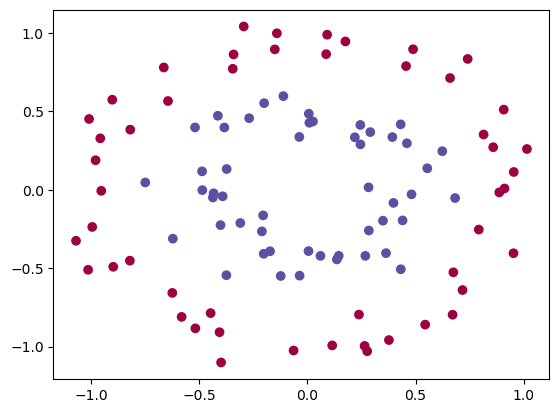

In [17]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate a dataset of concentric circles
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)

# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()


# 8] What are local outliers and global outliers, and how do they differ from each other?


## 2) Local Outliers:

### => Exhibit anomalous behavior compared to their local neighborhood of data points.
### => May not appear anomalous when considering the entire dataset globally.
### => Detected by proximity-based and density-based anomaly detection methods.
### => Have significantly lower density than their nearest neighbors.
### => Example: A data point that is isolated from its nearby cluster.
## 2) Global Outliers:

### => Appear anomalous when considering the entire dataset.
### => Deviate significantly from the global data distribution.
### => Detected by global anomaly detection methods.
### => Have features and values very different from most data points.
### => Example: A data point with an extremely large value compared to rest.

# 9] How can local outliers be detected using the Local Outlier Factor (LOF) algorithm?


### => For each data point, identify its k-nearest neighbors (local neighborhood).
### => Calculate the reachability distance between the point and its neighbors. This is the maximum of the k-distance of the two points.
### => Compute the local reachability density (LRD) of each point, which is inverse of the average reachability distance from its neighbors.
### => Determine the local outlier factor (LOF) for each data point as the ratio of average LRD of its neighbors by its own LRD.
### => Points with a LOF significantly greater than 1 are local outliers, as their density is much lower compared to their local neighborhood.
### Key aspects:

### => LOF captures local density relative to the k-nearest neighbors. It does not require knowing global data distribution.
### => Points with lower local density than their neighbors get higher LOF scores making them local outliers.
### => The k-distance neighborhood parameter controls how locally to assess outlier-ness.
### => LOF is very effective in detecting distance-based local outliers and does not make global density assumptions.

# 10] How can global outliers be detected using the Isolation Forest algorithm?


### => Isolation Forest isolates observations by recursively splitting feature space to separate each point into its own partition.
### => It builds an ensemble of isolation trees for the dataset.
### => When building the isolation trees, instances that require fewer partitions to be isolated are highly divergent points.
### => For a global outlier, the average path length for it to get isolated across trees will be much smaller compared to normal points.
### => The anomaly score in Isolation Forest is calculated based on the average path length - smaller length implies higher anomaly score.
### => Points having significantly lower average path length and higher anomaly score are flagged as global outliers.
## Key aspects:

### => Does not rely on local density, captures global deviation.
### => Trees isolate points based on their feature values without locality assumptions.
### => Global outliers are partitioned much faster due to being highly distinct.
### => Simple, interpretable and intrinsically capable of detecting global outliers.
### => So in summary, Isolation Forest can detect globally anomalous points that are distinct compared to the entire dataset by exploiting their isolation paths during tree construction.

# 11] What are some real-world applications where local outlier detection is more appropriate than global outlier detection, and vice versa?

## 1) Local outlier detection is useful when:

### => Detecting anomalies in spatial data like faulty sensors in a sensor network where locality is important.
### => Identifying fraud in localized regions and subgroups. For example, unusual transactions in specific geographic areas.
### => Monitoring time series data like vital signs for temporary anomalies for short durations.
### => Finding odd observations that deviate from their local context, like defective products in a batch.
### => Isolating sparse regions and small clusters as anomalies in highly dense datasets.
## 2) Global outlier detection is useful when:

### => Identifying extreme global deviations like patients with unprecedented symptoms in healthcare.
### => Detecting events strongly divergent from the general population distribution. For example, rare genetic mutations.
### => Finding outliers in data without clear locality or cluster structure.
### => Building highly robust models by removing all globally anomalous samples.
### => Detecting any instances that violate global assumptions or patterns.